# NumPy Basics

## Chapter Outline

- In this chapter, **you will learn about**:
> - `ndarray`, an **efficient multidimensional array** providing fast array-oriented arithmetic operations,
> - **Mathematical functions for fast operations** on entire arrays of data without having to write loops,
> - **Other useful stuff** like random number generation, linear algera and statistics.

- **Where can you get help?**
> - **Follow along** with the code and **try it yourself**,
> - **Search** for it,
> - You can always **ask for help!**

## What is NumPy?

- A **third-party** package,
- Short for **Numerical Python**,
- In 2005, **Travis Oliphant was able to forge the NumPy project** from the then Numeric and Numarray projects into a single array computing framework,
- One of the most important foundational packages for **numerical computing** in Python,
- Much of the knowledge about NumPy that we will cover is **transferable to Pandas** as well.

## Python Lists Vs NumPy Arrays

- One of the reasons NumPy is so important for numerical computations in Python is because **it is designed for efficiency on large arrays of data**:
> - NumPy internally **stores data in a contiguous block of memory**, independent of other built-in Python objects,
> - NumPy **performs complex computations on entire arrays** without the need for Python for loops.

- To give you an idea of the **performance difference**, consider a Python list of one million integers, and the equivalent NumPy array:

In [1]:
py_list = list(range(1_000_000))
len(py_list)

1000000

In [2]:
import numpy as np
np_arr = np.array(range(1_000_000))
len(np_arr)

1000000

- Now let’s multiply each sequence by 2:

In [3]:
%%time
result1 = [x * 2 for x in py_list]

CPU times: total: 406 ms
Wall time: 665 ms


In [4]:
%%time
result2 = np_arr * 2

CPU times: total: 0 ns
Wall time: 0 ns


- NumPy-based algorithms are generally **10 to 100 times faster (or more)** than their pure Python counterparts and use significantly less memory.

## Working with NumPy arrays

### The NumPy ndarray

#### Anatomy of a NumPy Array

- An ndarray is a **generic multidimensional container for homogeneous data** (that is, all of the elements must be the same type):

In [5]:
arr_1d = np.array([1, 2, 3])
arr_1d

array([1, 2, 3])

In [6]:
type(arr_1d)

numpy.ndarray

- Every array has a **shape**, a tuple indicating the size of each dimension:

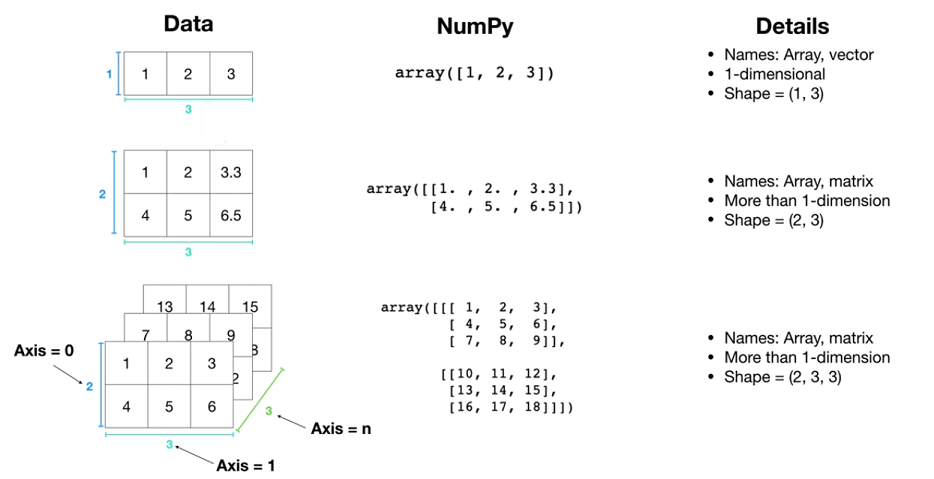

In [7]:
arr_1d.shape

(3,)

In [8]:
arr_2d = np.array([[1, 2, 3.3],
                   [4, 5, 6.5]])
arr_2d

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [9]:
arr_2d.shape

(2, 3)

In [10]:
arr_3d = np.array([[[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]],
                   
                   [[10, 11, 12],
                    [13, 14, 15],
                    [16, 17, 18]]])
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [11]:
arr_3d.shape

(2, 3, 3)

- Every array has a **dtype**, an object describing the data type of the array:

In [12]:
arr_1d.dtype

dtype('int32')

In [13]:
arr_2d.dtype

dtype('float64')

In [14]:
arr_3d.dtype

dtype('int32')

#### Creating NumPy Arrays

- The easiest way to create an array is to **use the array function**, this accepts any **sequence-like object** (including other arrays) and produces a new NumPy array containing the passed data:

In [15]:
py_list = [1, 2, 3]
np_arr = np.array(py_list)
np_arr

array([1, 2, 3])

- Also, there are a number of **other functions for creating new arrays**:

In [16]:
zeros_arr = np.zeros(shape=(2, 2))
zeros_arr

array([[0., 0.],
       [0., 0.]])

In [17]:
ones_arr = np.ones(shape=(2, 2))
ones_arr

array([[1., 1.],
       [1., 1.]])

In [18]:
full_arr = np.full(shape=(2, 2), fill_value=2)
full_arr

array([[2, 2],
       [2, 2]])

In [19]:
empty_arr = np.empty(shape=(2, 2))
empty_arr # It’s not safe to assume that numpy.empty will return an array of all zeros.

array([[1., 1.],
       [1., 1.]])

In [20]:
id_arr = np.identity(n=3)
id_arr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
zeros_like_arr = np.zeros_like(py_list)
zeros_like_arr

array([0, 0, 0])

In [22]:
arange_arr = np.arange(1, 10, 1)
arange_arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
equally_spaced_nums_arr = np.linspace(1, 10, 10)
equally_spaced_nums_arr

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

- The NumPy `random` module supplements the **built-in Python random module** with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions:

In [24]:
rng = np.random.default_rng(seed=42)

In [25]:
int_arr = rng.integers(low=1, high=10, size=5)
int_arr

array([1, 7, 6, 4, 4], dtype=int64)

In [26]:
float_arr = rng.random(size=5)
float_arr

array([0.69736803, 0.09417735, 0.97562235, 0.7611397 , 0.78606431])

### Filtering and Reshaping NumPy Arrays

#### Basic Indexing and Slicing

##### Basic Indexing

- One-dimensional arrays are simple; on the surface they **act similarly to Python lists**:

In [27]:
arr_1d = np.arange(10)
arr_1d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
idx = arr_1d[5]
idx

5

- An important first distinction from Python’s built-in lists is that **array slices are views on the original array**:

In [29]:
slice = arr_1d[5:8]
slice

array([5, 6, 7])

In [30]:
slice[1] = 0
slice

array([5, 0, 7])

In [31]:
arr_1d

array([0, 1, 2, 3, 4, 5, 0, 7, 8, 9])

- If you want a copy of a slice of an ndarray instead of a view, **you will need to explicitly copy the array**:

In [32]:
arr_1d = np.arange(10)
arr_1d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
slice = arr_1d[5:8].copy()
slice[1] = 0
slice

array([5, 0, 7])

In [34]:
arr_1d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- In a two-dimensional array, **the elements at each index are no longer scalars but rather one-dimensional arrays**:

In [35]:
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [36]:
arr_2d.shape

(3, 3)

In [37]:
arr_2d[1]

array([4, 5, 6])

In [38]:
arr_2d[1].shape

(3,)

- Individual elements can be **accessed recursively**:

In [39]:
arr_2d[1][1]

5

In [40]:
arr_2d[1][1].shape

()

- You can pass a **comma-separated list of indices** to select individual elements:

In [41]:
arr_2d[1, 1]

5

In [42]:
arr_2d[1, 1].shape

()

- In multidimensional arrays, **if you omit later indices, the returned object will be a lower dimensional ndarray** consisting of all the data along the higher dimensions:

In [43]:
arr_3d = np.array([[[ 1, 2, 3],
                    [ 4, 5, 6]],
                   [[ 7, 8, 9],
                    [10, 11, 12]]])
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [44]:
arr_3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
arr_3d[0].shape

(2, 3)

In [46]:
arr_3d[0, 0]

array([1, 2, 3])

In [47]:
arr_3d[0, 0].shape

(3,)

##### Indexing with slices

- Like one-dimensional objects such as Python lists, **ndarrays can be sliced with the familiar syntax**:

In [48]:
arr_1d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
arr_1d[1:6]

array([1, 2, 3, 4, 5])

- Consider the **two-dimensional array** from before, arr2d, slicing this array is a bit different:

In [50]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
arr_2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

- You can pass **multiple slices** just like you can pass multiple indexes:

In [52]:
arr_2d[:2, 1:]

array([[2, 3],
       [5, 6]])

- By **mixing integer indexes and slices**, you get **lower dimensional** slices:

In [53]:
arr_2d[:2, 1]

array([2, 5])

In [54]:
arr_2d[:2, 1].shape

(2,)

- See this **figure** for an illustration:

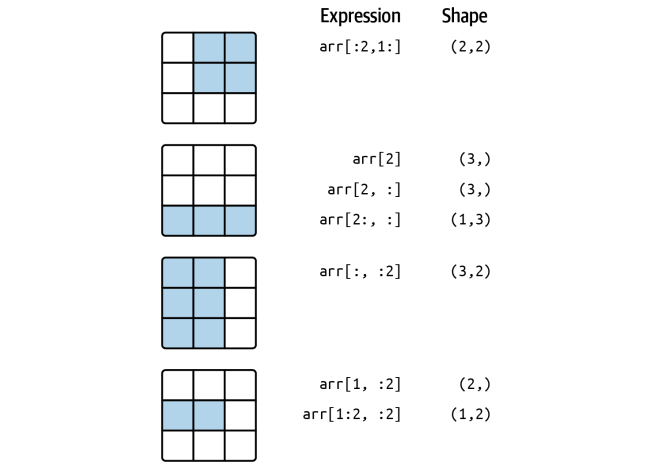

#### Boolean Indexing

- **What is Boolean indexing (masking)?**
  > - Boolean indexing involves **using boolean arrays** to index or filter data in NumPy arrays,
  > - A Boolean array is created **by applying a condition to an existing array**, resulting in a new array of `True` and `False` values
  > - The Boolean array is then **used as an index** to select elements from the original array.

- Let’s consider an example where we have some **data** in an array and an array of **names** with duplicates:

In [55]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [56]:
data = np.array([[4, 7],
                 [0, 2],
                 [-5, 6],
                 [0, 0],
                 [1, 2],
                 [-12, -4],
                 [3, 4]])
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

- Suppose each name corresponds to a row in the data array and we wanted to **select all the rows with the corresponding name "Bob"**:

In [57]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

- This Boolean array **can be passed when indexing the array**:

In [58]:
data[names == 'Bob']

array([[4, 7],
       [0, 0]])

- You can even **mix and match Boolean arrays with slices or integers**:

In [59]:
data[names == 'Bob', 1:]

array([[7],
       [0]])

- To **select everything but "Bob"** you can either **use `!=` or negate the condition using `~`**:

In [60]:
data[names != 'Bob']

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [61]:
data[~(names == 'Bob')]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

- To select two of the three names **to combine multiple Boolean conditions, use Boolean arithmetic operators** like `&` (and) and `|` (or):

In [62]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [63]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

- **The Python keywords `and` and `or` do not work with Boolean arrays, use `&` (and) and `|` (or) instead.**
- **Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.**

- Setting values with Boolean arrays works by substituting the value or values on the righthand side into the locations **where the Boolean array’s values are `True`**:

In [64]:
data[data < 0]

array([ -5, -12,  -4])

In [65]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

#### Fancy Indexing

- **What is fancy indexing?**
> - Fancy indexing refers to **using arrays of indices** to access or modify elements in a NumPy array,
> -  It **allows for advanced and non-contiguous indexing**, providing flexibility in selecting elements.

- Suppose we had an 8 × 4 array:

In [66]:
arr = np.zeros(shape=(8, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [67]:
for i in range(len(arr)):
    arr[i] = i

In [68]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

- To select a **subset of the rows in a particular order**, you can simply pass a list or ndarray of integers specifying the desired order:

In [69]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

- **Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable.**

#### Reshaping arrays

- Another useful type of operation is reshaping of arrays, which can be done with the `.reshape()` method:

In [70]:
arr = np.arange(1, 10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
reshaped_arr = arr.reshape((3, 3))
reshaped_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- Transposing is a **special form of reshaping** that similarly returns a **view on the underlying data** without copying anything.
- Arrays have the `.transpose()` method and the special `.T` attribute:

In [72]:
reshaped_arr.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

### Working with NumPy Arrays

#### Universal Functions

- A universal function, or **ufunc**, is a **function that performs element-wise operations on data in ndarrays**, this is called **vectorizaion**.
- **Rules of vectorization:**
> - Arrays must be of **equal-size**,
> - Operations are applied  **element-wise**.

In [73]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [74]:
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

- **Broadcasting extends the concept of vectorization to arrays of different shapes**, allowing them to be used together in operations.
- **Rules of broadcasting:**
> - If the **two arrays differ in their number of dimensions**, the shape of the one with fewer dimensions is padded with ones on its leading (left) side,
> - If the **shape of the two arrays does not match in any dimension**, the array with shape equal to 1 in that dimension is stretched to match the other shape,
> - If in any dimension **the sizes disagree and neither is equal to 1**, an error is raised.

In [75]:
arr1 = np.arange(3)
arr1

array([0, 1, 2])

In [76]:
arr1 + 5

array([5, 6, 7])

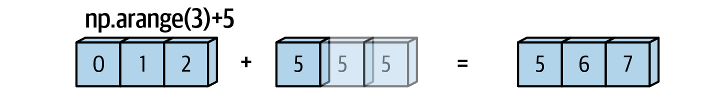

In [77]:
arr2 = np.ones(shape=(3, 3))
arr2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [78]:
arr2 + arr1

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

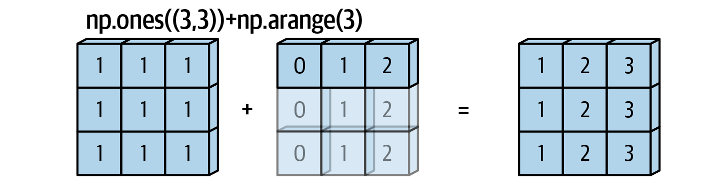

In [79]:
arr3 = arr1.reshape((3, 1))
arr3

array([[0],
       [1],
       [2]])

In [80]:
arr3 + arr1

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

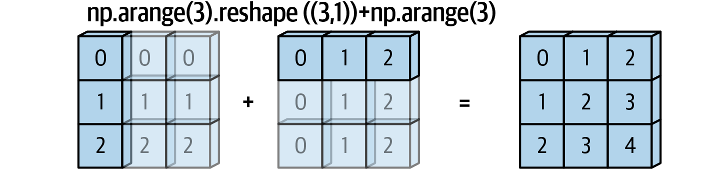

- Some **binary unfuncs**:

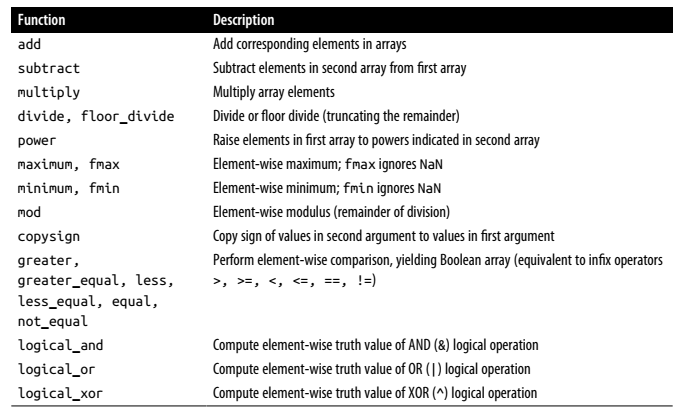

#### Arithmetic with NumPy Arrays

- NumPy enables efficient and concise arithmetic operations on arrays, **both element-wise and using broadcasting**.
- NumPy’s ufuncs feel very natural to use because they **make use of Python’s native arithmetic operators**, the standard addition, subtraction, multiplication, and division can all be used:

In [81]:
arr = np.arange(1, 7).reshape((2, 3))
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [82]:
arr + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [83]:
arr - 2

array([[-1,  0,  1],
       [ 2,  3,  4]])

In [84]:
arr * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [85]:
arr / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [86]:
arr // 2

array([[0, 1, 1],
       [2, 2, 3]], dtype=int32)

In [87]:
arr % 2

array([[1, 0, 1],
       [0, 1, 0]], dtype=int32)

In [88]:
arr ** 2

array([[ 1,  4,  9],
       [16, 25, 36]])

- Multiplying two two-dimensional arrays with `*` is an element-wise product, while **matrix multiplication** require using another operator `@`:

In [89]:
arr1 = np.arange(1, 4).reshape((1, 3))
arr1

array([[1, 2, 3]])

In [90]:
arr2 = np.arange(1, 7).reshape((3, 2))
arr2

array([[1, 2],
       [3, 4],
       [5, 6]])

In [91]:
arr1 @ arr2

array([[22, 28]])

- All of these arithmetic operations are **simply convenient wrappers around the ufuncs built into NumPy**. 

#### Aggregations

- Summing the values in an array:

In [92]:
arr = np.arange(1, 10).reshape((3, 3))
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [93]:
np.sum(arr)

45

In [94]:
np.sum(arr, axis=0)

array([12, 15, 18])

In [95]:
np.sum(arr, axis=1)

array([ 6, 15, 24])

- Minimum and maximum:

In [96]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [97]:
np.max(arr)

9

In [98]:
np.min(arr, axis=0)

array([1, 2, 3])

In [99]:
np.min(arr, axis=1)

array([1, 4, 7])

- Mean, variance and standard deviation:

In [100]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [101]:
np.mean(arr)

5.0

In [102]:
np.var(arr)

6.666666666666667

In [103]:
np.std(arr)

2.581988897471611

In [104]:
np.std(arr, ddof=1)

2.7386127875258306